# CNN Plots

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -r /content/drive/MyDrive/Google_Colab/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
%cd /content/drive/MyDrive/Google_Colab

/content/drive/MyDrive/Google_Colab


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import qsttoolkit as qst

## Data Preparation

In [5]:
data = qst.data.optical_state_dataset(dim=32,
                                      data_dim=32,
                                      state_numbers=[1000, 1000, 1000, 1000, 1000, 1000, 0, 1000],       # Large numbers of GKP states take an intractable amount of time to produce, and are difficult to produce practically
                                      mixed_state_noise_level = 0.2,
                                      Gaussian_conv_ntherm = 2.0,
                                      affine_theta = 20.0,
                                      affine_x = 0.1,
                                      affine_y = 0.1,
                                      additive_Gaussian_stddev = 0.001,
                                      pepper_p = 0.01,
                                      salt_p = 0.0)

/content/drive/MyDrive/Google_Colab/qsttoolkit/data/state_batches.py:170: UserWarning: thermal states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.
  warnings.warn("thermal states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.")
/content/drive/MyDrive/Google_Colab/qsttoolkit/data/state_batches.py:365: UserWarning: Random states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.
  warnings.warn("Random states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the 

States generated
DataFrames initialized
Fock data generated
Coherent data generated
Thermal data generated
Num data generated
Binomial data generated
Cat data generated
GKP data generated
Random data generated
Dataset generated


In [6]:
data.head()

,label,density_matrix,Husimi-Q_function,state_parameter
0,num,[[(0.007995679367352342+2.0679539730044304e-21...,"[[0.011102484515187432, 0.007922113425856756, ...",1.561553+ 0.000000j
1,cat,[[(0.008191345118053887+8.301133624403482e-22j...,"[[0.004336690702440067, 0.004054051891173362, ...",3.473675- 4.379221j
2,num,[[(0.007143382952058403-1.8738825230716335e-20...,"[[0.009403964818194882, 0.009137795572963462, ...",4.335775+ 0.000000j
3,binomial,[[(0.011846975558365221-1.5806815323224365e-20...,"[[0.01022277280963178, 0.014173154952248706, 0...",2.000000+ 0.000000j
4,fock,[[(0.005767714185498169-1.0068520361367785e-20...,"[[0.013397194340890997, 0.014064569192109334, ...",13.000000+ 0.000000j


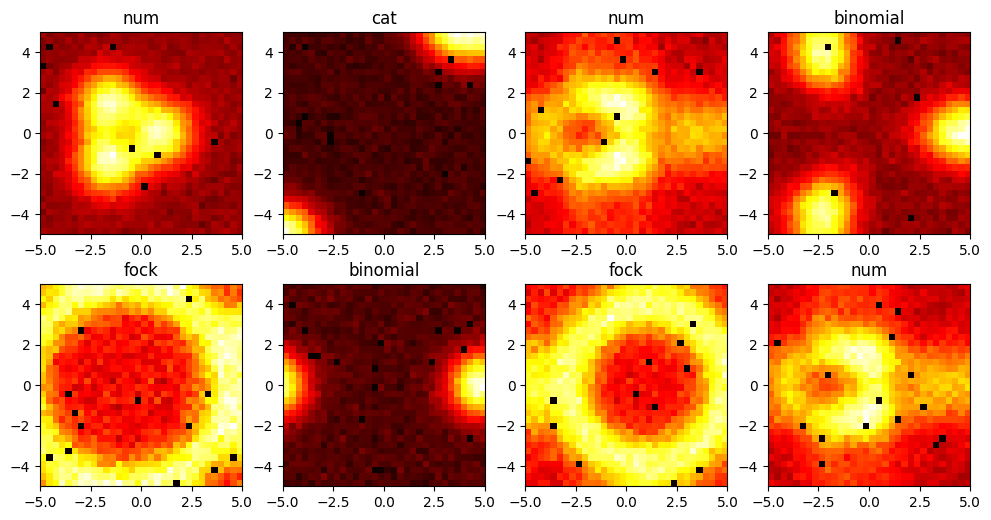

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs[0,0].imshow(data['Husimi-Q_function'][0], extent=[-5,5,-5,5], cmap='hot')
axs[0,0].set_title(data['label'][0])
axs[0,1].imshow(data['Husimi-Q_function'][1], extent=[-5,5,-5,5], cmap='hot')
axs[0,1].set_title(data['label'][1])
axs[0,2].imshow(data['Husimi-Q_function'][2], extent=[-5,5,-5,5], cmap='hot')
axs[0,2].set_title(data['label'][2])
axs[0,3].imshow(data['Husimi-Q_function'][3], extent=[-5,5,-5,5], cmap='hot')
axs[0,3].set_title(data['label'][3])
axs[1,0].imshow(data['Husimi-Q_function'][4], extent=[-5,5,-5,5], cmap='hot')
axs[1,0].set_title(data['label'][4])
axs[1,1].imshow(data['Husimi-Q_function'][5], extent=[-5,5,-5,5], cmap='hot')
axs[1,1].set_title(data['label'][5])
axs[1,2].imshow(data['Husimi-Q_function'][6], extent=[-5,5,-5,5], cmap='hot')
axs[1,2].set_title(data['label'][6])
axs[1,3].imshow(data['Husimi-Q_function'][7], extent=[-5,5,-5,5], cmap='hot')
axs[1,3].set_title(data['label'][7])
plt.show()

## Modelling

In [8]:
X = data['Husimi-Q_function']
y_raw = data['label']
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y_raw)
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=42)
latent_dim = X_train[0].shape[0]
X_train = np.array([x for x in X_train]).reshape(-1, latent_dim, latent_dim, 1)
X_test = np.array([x for x in X_test]).reshape(-1, latent_dim, latent_dim, 1)

In [9]:
state_discriminator = qst.tomography.CNNQuantumStateDiscrimination(dim=32,
                                                                   X_train=X_train,
                                                                   X_test=X_test,
                                                                   y_train=y_train,
                                                                   y_test=y_test,
                                                                   label_encoder=label_encoder,
                                                                   early_stopping_patience=3,
                                                                   lr_scheduler_factor=0.5,
                                                                   lr_scheduler_patience=2)

<ipython-input-9-f09c18978eac>:1: DeprecationWarning: dim is no longer required for this class and will be removed in a future version.
  state_discriminator = qst.tomography.CNNQuantumStateDiscrimination(dim=32,


In [10]:
state_discriminator.train(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'],
                          epochs=50,
                          batch_size=32,
                          validation_split=0.2)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2898 - loss: 1.7421 - val_accuracy: 0.6634 - val_loss: 0.9835 - learning_rate: 0.0010
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7093 - loss: 0.7921 - val_accuracy: 0.8071 - val_loss: 0.5121 - learning_rate: 0.0010
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8226 - loss: 0.5013 - val_accuracy: 0.8232 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8597 - loss: 0.4188 - val_accuracy: 0.8313 - val_loss: 0.4233 - learning_rate: 0.0010
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8832 - loss: 0.3429 - val_accuracy: 0.8705 - val_loss: 0.3017 - learning_rate: 0.0010
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8972 - loss: 0.2971 - val_accuracy: 0.8429 - val_loss: 0.3242 - learning_rate: 0.0010
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9166 - loss: 0.2379

## Analysis and Evaluation

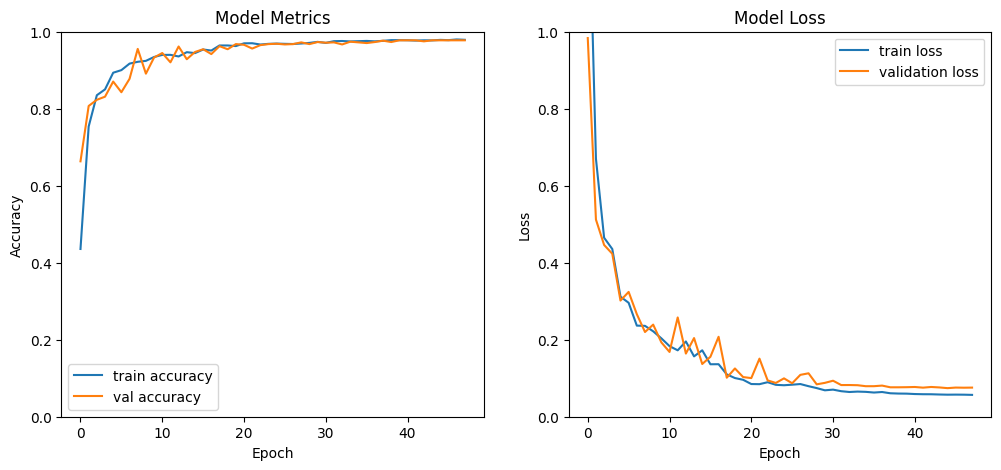

In [11]:
state_discriminator.plot_training()

In [ ]:
state_discriminator.evaluate_classification(include_density_matrix=False)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


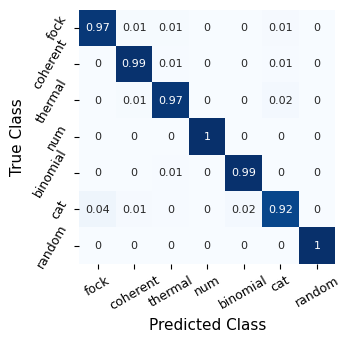

In [16]:
y_pred = np.argmax(state_discriminator.model.predict(state_discriminator.X_test), axis=1)
y_labels = state_discriminator.label_encoder.inverse_transform(state_discriminator.y_test)
order = ['fock', 'coherent', 'thermal', 'num', 'binomial', 'cat', 'random']

def format_decimal_places(val, pos=None):
    """Formats a number to display a maximum of 3 decimal places."""
    return round(val, 2)

# Confusion matrix and plot
plt.figure(figsize=(3.3, 3.3))
cm = confusion_matrix(state_discriminator.y_test, y_pred, normalize='true')
reordered_cm = cm[state_discriminator.label_encoder.transform(order), :][:, state_discriminator.label_encoder.transform(order)]
annotations = np.vectorize(format_decimal_places)(reordered_cm)
sns.heatmap(reordered_cm, annot=annotations, cmap='Blues', xticklabels=order, yticklabels=order, cbar=False, annot_kws={'size': 8})
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Class', fontsize=11)
plt.ylabel('True Class', fontsize=11)
plt.xticks(fontsize=9, rotation=30)
plt.yticks(fontsize=9, rotation=60)

plt.savefig('confusion.png', dpi=300, bbox_inches='tight')
plt.show()